# Part 3: Indego Data Analysis with SQL and Pandas
## ***Work in Progress***

Jump to a specific section:
<br> *(jump to does not work if viewing thru GitHub)*<br>
- [Data overview](#Data-overview)
- [Analyze station data](#Analyze-station-data)
- [Join trip data with distance data](#Join-trip-data-with-distance-data)
- [Analyze trip data](#Analyze-trip-data)
- [Analyze trip data for standard vs electric bikes](#Analyze-trip-data-for-standard-vs-electric-bikes)

## Data overview
[Return to top](#Part-3:-Indego-Data-Analysis-with-SQL-and-Pandas)

<br>Load the db

In [5]:
%%capture
%load_ext sql
%sql sqlite:///bike_trip_db

<br>Print the list of tables

In [172]:
%%sql
SELECT *
FROM sqlite_master
WHERE type='table';

 * sqlite:///bike_trip_db
Done.


type,name,tbl_name,rootpage,sql
table,stations,stations,2,"CREATE TABLE ""stations"" (""station_id"" INTEGER, ""station_name"" TEXT, ""day_of_go_live_date"" TIMESTAMP, ""status"" TEXT, ""neighborhood"" TEXT, ""station_lat"" REAL, ""station_lon"" REAL)"
table,station_combos,station_combos,45771,"CREATE TABLE ""station_combos"" (""start_name"" TEXT, ""end_name"" TEXT, ""distance"" REAL)"
table,trips,trips,45773,"CREATE TABLE ""trips"" (""trip_id"" INTEGER, ""duration"" INTEGER, ""start_time"" TIMESTAMP, ""end_time"" TIMESTAMP, ""start_station"" INTEGER, ""end_station"" INTEGER, ""bike_id"" TEXT, ""plan_duration"" REAL, ""trip_route_category"" TEXT, ""passholder_type"" TEXT, ""bike_type"" TEXT)"


<br>Print the first few rows from each table

In [7]:
%%sql
SELECT * 
FROM stations
LIMIT 5

 * sqlite:///bike_trip_db
Done.


station_id,station_name,day_of_go_live_date,status,neighborhood,station_lat,station_lon
3000,Virtual Station,2015-04-23 00:00:00,Active,Center City,None,None
3004,Municipal Services Building Plaza,2015-04-23 00:00:00,Active,Center City,39.953781,-75.163742
3005,"Welcome Park, NPS",2015-04-23 00:00:00,Active,Center City East,39.94733,-75.144028
3006,40th & Spruce,2015-04-23 00:00:00,Active,University City,39.952202,-75.20311
3007,"11th & Pine, Kahn Park",2015-04-23 00:00:00,Active,Washington Square West,39.945171,-75.159927


In [8]:
%%sql
SELECT COUNT(*) 
FROM stations
LIMIT 5

 * sqlite:///bike_trip_db
Done.


COUNT(*)
180


In [9]:
%%sql
SELECT * 
FROM trips
LIMIT 5

 * sqlite:///bike_trip_db
Done.


trip_id,duration,start_time,end_time,start_station,end_station,bike_id,plan_duration,trip_route_category,passholder_type,bike_type
306773863,8,2019-01-01 00:19:00,2019-01-01 00:27:00,3049,3007,14495,30.0,One Way,Indego30,standard
306773862,7,2019-01-01 00:30:00,2019-01-01 00:37:00,3005,3007,05332,1.0,One Way,Day Pass,standard
306773861,13,2019-01-01 00:52:00,2019-01-01 01:05:00,3166,3169,14623,30.0,One Way,Indego30,standard
306773860,9,2019-01-01 00:55:00,2019-01-01 01:04:00,3058,3103,11706,30.0,One Way,Indego30,standard
306773859,12,2019-01-01 01:05:00,2019-01-01 01:17:00,3182,3028,11039,30.0,One Way,Indego30,standard


In [10]:
%%sql
SELECT COUNT(*)
FROM trips

 * sqlite:///bike_trip_db
Done.


COUNT(*)
1989934


In [11]:
%%sql
SELECT * from station_combos
LIMIT 5

 * sqlite:///bike_trip_db
Done.


start_name,end_name,distance
10th & Chestnut,10th & Federal,1.1
10th & Chestnut,11th & Market,0.4
10th & Chestnut,"11th & Pine, Kahn Park",0.6
10th & Chestnut,"11th & Poplar, John F. Street Community Center",1.6
10th & Chestnut,11th & Reed,1.3


In [12]:
%%sql
SELECT *
FROM station_combos
LIMIT 5

 * sqlite:///bike_trip_db
Done.


start_name,end_name,distance
10th & Chestnut,10th & Federal,1.1
10th & Chestnut,11th & Market,0.4
10th & Chestnut,"11th & Pine, Kahn Park",0.6
10th & Chestnut,"11th & Poplar, John F. Street Community Center",1.6
10th & Chestnut,11th & Reed,1.3


## Analyze station data
[Return to top](#Part-3:-Indego-Data-Analysis-with-SQL-and-Pandas)

<br>Get a list of all neighborhoods and the count of Indego stations

In [30]:
%%sql
SELECT neighborhood, COUNT(*) count
FROM stations
GROUP BY neighborhood
ORDER BY count DESC;

 * sqlite:///bike_trip_db
Done.


neighborhood,count
North Philadelphia,35
University City,25
Center City,21
Center City West,12
Center City East,11
West Philadelphia,9
Rittenhouse Square,6
Point Breeze,6
Graduate Hospital,6
Washington Square West,4


<br>See how many stations are in Center City, inclusive of those with East/West suffixes

In [20]:
%%sql
SELECT COUNT(*) count
FROM stations
WHERE neighborhood LIKE 'Center City%'

 * sqlite:///bike_trip_db
Done.


count
44


<br>Are any stations inactive?

In [23]:
%%sql
SELECT *
FROM stations
WHERE status = "Inactive"

 * sqlite:///bike_trip_db
Done.


station_id,station_name,day_of_go_live_date,status,neighborhood,station_lat,station_lon
3023,Rittenhouse Square,2015-04-23 00:00:00,Inactive,Rittenhouse Square,None,None
3027,"40th Street Station, MFL",2015-04-23 00:00:00,Inactive,University City,39.95694,-75.200691
3036,2nd & Germantown,2015-04-23 00:00:00,Inactive,North Philadelphia,39.968441,-75.140007
3038,The Children's Hospital of Philadelphia (CHOP),2015-04-23 00:00:00,Inactive,University City,39.947811,-75.194092
3048,Broad & Fitzwater,2015-04-23 00:00:00,Inactive,South Philadelphia,None,None
3095,29th & Diamond,2016-04-28 00:00:00,Inactive,North Philadelphia,39.987709,-75.180519
3103,"27th & Master, Athletic Recreation Center",2016-05-03 00:00:00,Inactive,North Philadelphia,39.977139,-75.179398
3105,Penn Treaty Park,2016-05-03 00:00:00,Inactive,North Philadelphia,39.96207,-75.141113
3109,Parkside & Girard,2016-05-06 00:00:00,Inactive,East Parkside,None,None
3122,"24th & Cecil B. Moore, Cecil B. Moore Library",2016-04-27 00:00:00,Inactive,North Philadelphia,None,None


<br>Find the top ten neighborhoods by active stations. Treat all Center City stations as a single neighborhood

In [31]:
%%sql
WITH stations_updated_neighborhoods AS (
    SELECT *, 
    CASE 
        WHEN neighborhood LIKE 'Center City%' THEN 'Center City'
        ELSE neighborhood
    END updated_neighborhood
    FROM stations
)
SELECT 
    updated_neighborhood, 
    COUNT(*) count
FROM stations_updated_neighborhoods
WHERE status = 'Active'
GROUP BY updated_neighborhood
ORDER BY count DESC
LIMIT 10;

 * sqlite:///bike_trip_db
Done.


updated_neighborhood,count
Center City,42
North Philadelphia,30
University City,22
West Philadelphia,9
Point Breeze,6
Rittenhouse Square,5
Graduate Hospital,5
Washington Square West,4
South Philadelphia East,4
West Poplar,3


## Join trip data with distance data
[Return to top](#Part-3:-Indego-Data-Analysis-with-SQL-and-Pandas)

In [64]:
%%sql
DROP VIEW IF EXISTS station_combos_with_id;

CREATE VIEW station_combos_with_id AS
    SELECT 
        sc.start_name, 
        s1.station_id start_id, 
        s1.neighborhood start_neighborhood, 
        sc.end_name,
        s2.station_id end_id, 
        s2.neighborhood end_neighborhood,
        sc.distance
    FROM station_combos sc
    LEFT JOIN stations s1
    ON sc.start_name = s1.station_name
    LEFT JOIN stations s2
    ON sc.end_name = s2.station_name;

SELECT *
FROM station_combos_with_id
LIMIT 10;

 * sqlite:///bike_trip_db
Done.
Done.
Done.


start_name,start_id,start_neighborhood,end_name,end_id,end_neighborhood,distance
10th & Chestnut,3033,Center City East,10th & Federal,3098,South Philadelphia,1.1
10th & Chestnut,3033,Center City East,11th & Market,3185,Center City East,0.4
10th & Chestnut,3033,Center City East,"11th & Pine, Kahn Park",3007,Washington Square West,0.6
10th & Chestnut,3033,Center City East,"11th & Poplar, John F. Street Community Center",3016,West Poplar,1.6
10th & Chestnut,3033,Center City East,11th & Reed,3034,South Philadelphia,1.3
10th & Chestnut,3033,Center City East,11th & South,3101,Washington Square West,0.6
10th & Chestnut,3033,Center City East,11th & Washington,3025,Bella Vista,1.1
10th & Chestnut,3033,Center City East,12th & Callowhill,3154,Center City,0.9
10th & Chestnut,3033,Center City East,12th & Chestnut,3167,Gayborhood,0.3
10th & Chestnut,3033,Center City East,12th & Filbert,3018,Center City East,0.7


In [72]:
%%sql
DROP VIEW IF EXISTS trips_with_distance;

CREATE VIEW trips_with_distance AS
    SELECT 
        t.trip_id,
        scwi.start_id,
        scwi.start_name,
        scwi.start_neighborhood,
        scwi.end_id,
        scwi.end_name, 
        scwi.end_neighborhood,
        t.start_time, 
        t.end_time,
        t.duration,
        scwi.distance,
        t.bike_id,
        t.plan_duration,
        t.trip_route_category,
        t.passholder_type,
        t.bike_type
    FROM trips t 
    LEFT JOIN station_combos_with_id scwi
    ON t.start_station = scwi.start_id AND t.end_station = scwi.end_id;

SELECT * FROM trips_with_distance
LIMIT 5;

 * sqlite:///bike_trip_db
Done.
Done.
Done.


trip_id,start_id,start_name,start_neighborhood,end_id,end_name,end_neighborhood,start_time,end_time,duration,distance,bike_id,plan_duration,trip_route_category,passholder_type,bike_type
306773863,3049,Foglietta Plaza,Center City,3007,"11th & Pine, Kahn Park",Washington Square West,2019-01-01 00:19:00,2019-01-01 00:27:00,8,1.3,14495,30.0,One Way,Indego30,standard
306773862,3005,"Welcome Park, NPS",Center City East,3007,"11th & Pine, Kahn Park",Washington Square West,2019-01-01 00:30:00,2019-01-01 00:37:00,7,1.2,05332,1.0,One Way,Day Pass,standard
306773861,3166,Frankford & Belgrade,North Philadelphia,3169,2nd & Race,Center City East,2019-01-01 00:52:00,2019-01-01 01:05:00,13,1.6,14623,30.0,One Way,Indego30,standard
306773860,3058,20th & Fairmount,North Philadelphia,3103,"27th & Master, Athletic Recreation Center",North Philadelphia,2019-01-01 00:55:00,2019-01-01 01:04:00,9,1.3,11706,30.0,One Way,Indego30,standard
306773859,3182,17th & Sansom,Center City West,3028,4th & Bainbridge,Queen Village,2019-01-01 01:05:00,2019-01-01 01:17:00,12,1.9,11039,30.0,One Way,Indego30,standard


## Analyze trip data
[Return to top](#Part-3:-Indego-Data-Analysis-with-SQL-and-Pandas)

<br>Which neighborhoods are the most trips between?

In [173]:
%%sql
SELECT start_neighborhood, end_neighborhood, COUNT(*) count
FROM trips_with_distance
GROUP BY start_neighborhood, end_neighborhood
ORDER BY count DESC
LIMIT 15;

 * sqlite:///bike_trip_db
Done.


start_neighborhood,end_neighborhood,count
University City,University City,96560
North Philadelphia,North Philadelphia,81925
Center City,Center City,67468
North Philadelphia,Center City,40565
Center City East,Center City East,38701
Center City,North Philadelphia,38552
University City,Center City West,31194
Center City West,Center City West,30416
Center City West,University City,28368
Center City,Center City West,24888


<br>The same query, but filtering out results where start and end neighborhood match

In [82]:
%%sql
SELECT start_neighborhood, end_neighborhood, COUNT(*) count
FROM trips_with_distance
GROUP BY start_neighborhood, end_neighborhood
HAVING start_neighborhood <> end_neighborhood
ORDER BY count DESC
LIMIT 10;

 * sqlite:///bike_trip_db
Done.


start_neighborhood,end_neighborhood,count
North Philadelphia,Center City,40565
Center City,North Philadelphia,38552
University City,Center City West,31194
Center City West,University City,28368
Center City,Center City West,24888
Center City West,Center City,24861
University City,Center City,23869
Center City,Center City East,23094
Center City East,Center City,22830
Center City,University City,22099


<br>Which station has the fewest trips (start or end)?

In [103]:
%%sql

WITH num_trips_start AS (
    SELECT start_name station_name, COUNT(*) count
    FROM trips_with_distance
    GROUP BY start_name
    ),

    num_trips_end AS (
    SELECT end_name station_name, COUNT(*) count
    FROM trips_with_distance
    GROUP BY end_name
    ),
    
    num_trips_total AS (
    SELECT * FROM num_trips_start
    UNION ALL
    SELECT * FROM num_trips_end
    )

SELECT * FROM (
    SELECT 
        *,
        RANK () OVER (
            ORDER BY count
        ) count_rank
    FROM num_trips_total
    GROUP BY station_name
) WHERE count_rank <=3 

 * sqlite:///bike_trip_db
Done.


station_name,count,count_rank
2nd & Germantown,3,1
4th & Wood,11,2
15th & Walnut,19,3


## Analyze trip data for standard vs electric bikes
[Return to top](#Part-3:-Indego-Data-Analysis-with-SQL-and-Pandas)

<br>What percentages of trips use standard vs electric bikes?

In [112]:
%%sql
SELECT 
    bike_type, 
    COUNT(*) count, 
    100.0 * COUNT(*) / (SELECT COUNT(*) FROM trips_with_distance) percent_trips
FROM trips_with_distance
GROUP BY bike_type

 * sqlite:///bike_trip_db
Done.


bike_type,count,percent_trips
electric,424995,21.351168048229088
standard,1565505,78.64883195177092


<br>**Broken down by year,** what percentages of trips use standard vs electric bikes?

In [117]:
%%sql
SELECT 
    EXTRACT(year FROM start_time) AS year,
    bike_type, 
    COUNT(*) count, 
    100.0 * COUNT(*) / (SELECT COUNT(*) FROM trips_with_distance) percent_trips
FROM trips_with_distance
GROUP BY EXTRACT(year FROM start_time), bike_type

 * sqlite:///bike_trip_db
(sqlite3.OperationalError) near "FROM": syntax error
[SQL: SELECT 
    EXTRACT(year FROM start_time) AS year,
    bike_type, 
    COUNT(*) count, 
    100.0 * COUNT(*) / (SELECT COUNT(*) FROM trips_with_distance) percent_trips
FROM trips_with_distance
GROUP BY EXTRACT(year FROM start_time), bike_type]
(Background on this error at: https://sqlalche.me/e/14/e3q8)


In [131]:
%%sql
SELECT 
    strftime('%Y',start_time) year,
    bike_type, 
    COUNT(*) count, 
    100.0 * COUNT(*) / (SELECT COUNT(*) FROM trips_with_distance GROUP BY strftime('%Y',start_time)) percent_trips,
    COUNT(DISTINCT bike_id) num_bikes
FROM trips_with_distance
GROUP BY year, bike_type

 * sqlite:///bike_trip_db
Done.


year,bike_type,count,percent_trips,num_bikes
2019,electric,96672,13.687353724477443,265
2019,standard,609615,86.31264627552255,2163
2020,electric,146381,20.72542748202926,350
2020,standard,543346,76.92991659198032,1244
2021,electric,181942,25.760349546289255,579
2021,standard,412544,58.410249657717046,1087


In [167]:
import pandas as pd
import matplotlib.pyplot as plt

summary_bike_type = pd.read_sql('''
SELECT 
    strftime('%Y',start_time) year,
    bike_type, 
    COUNT(*) count, 
    100.0 * COUNT(*) / (SELECT COUNT(*) FROM trips_with_distance GROUP BY strftime('%Y',start_time)) percent_trips,
    COUNT(DISTINCT bike_id) num_bikes
FROM trips_with_distance
GROUP BY year, bike_type''', 'sqlite:///bike_trip_db')

summary_bike_type

,year,bike_type,count,percent_trips,num_bikes
0,2019,electric,96672,13.687354,265
1,2019,standard,609615,86.312646,2163
2,2020,electric,146381,20.725427,350
3,2020,standard,543346,76.929917,1244
4,2021,electric,181942,25.760350,579
5,2021,standard,412544,58.410250,1087


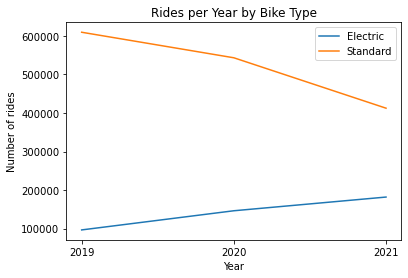

In [170]:
plt.title("Rides per Year by Bike Type")
plt.xlabel("Year")
plt.ylabel("Number of rides")
plt.plot(summary_bike_type['year'].unique(), summary_bike_type.loc[summary_bike_type['bike_type'] == 'electric', 'count'], label="Electric")
plt.plot(summary_bike_type['year'].unique(), summary_bike_type.loc[summary_bike_type['bike_type'] == 'standard', 'count'], label="Standard")

plt.legend()
plt.show()

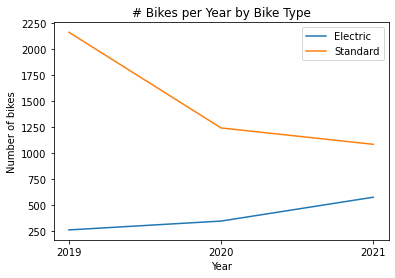

In [171]:
plt.title("# Bikes per Year by Bike Type")
plt.xlabel("Year")
plt.ylabel("Number of bikes")
plt.plot(summary_bike_type['year'].unique(), summary_bike_type.loc[summary_bike_type['bike_type'] == 'electric', 'num_bikes'], label="Electric")
plt.plot(summary_bike_type['year'].unique(), summary_bike_type.loc[summary_bike_type['bike_type'] == 'standard', 'num_bikes'], label="Standard")

plt.legend()
plt.show()

<br>How does mean trip time and distance between start and end station compare when using standard vs electric bikes?

<br>Do riders with day passes favor standard or electric bikes?